## Fluctuations on a path

##### Project description

*This is a basic visualization of a path that is a straight line with a random fluctuation in every step.*

##### Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

##### Input parameters

In [2]:
sigmas = [0.1, 0.3, 0.4, 0.5, 0.6, 0.7]#standard deviations to be tested
no_of_runs_per_sigma = 5
no_of_fluctuations = 10
target_value = 3
behind_the_target_value = 3.5
path_length = 10

##### auxiliary

In [3]:
no_of_x_points = 100*no_of_fluctuations
x=np.linspace(0, path_length, no_of_x_points)
y = behind_the_target_value/path_length*x
target = np.array([target_value]*len(x))

In [4]:
def repeated_entries(v, n):
    #repeats every v entry n times
    def my_concat(a,b):#wrapper around np.concatenate that is usable by reduce
        return np.concatenate((a,b))
    from functools import reduce
    return reduce(my_concat, [np.full((1,int(n)), v_entry)[0] for v_entry in v])#np.full may be used but it

def spreaded_array(v, target_length):
    #repeats entries of v so that it has target length
    #target_length must be multiplicity of length of v
    return repeated_entries(v, target_length/len(v))

In [5]:
fluct_pre_steps = np.cumsum(np.random.normal(0, 1, 9))#fluctuation steps
fluct_steps = np.concatenate((np.array([0]), fluct_pre_steps))

##### Draw plots

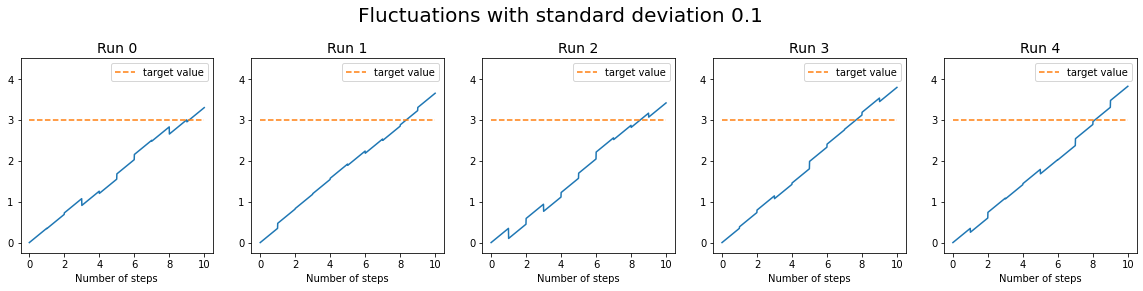

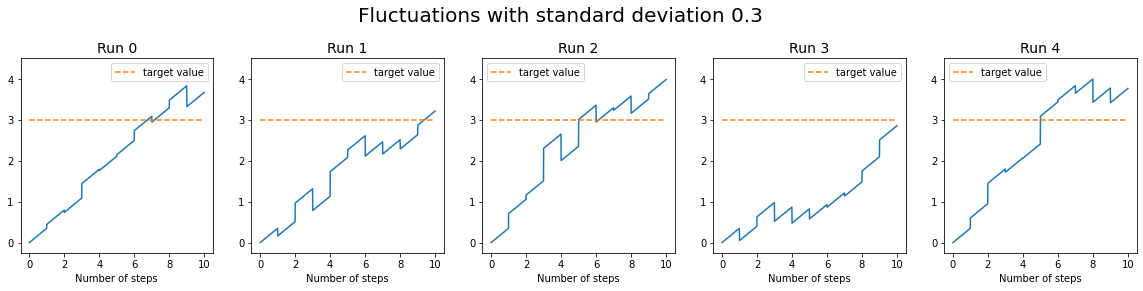

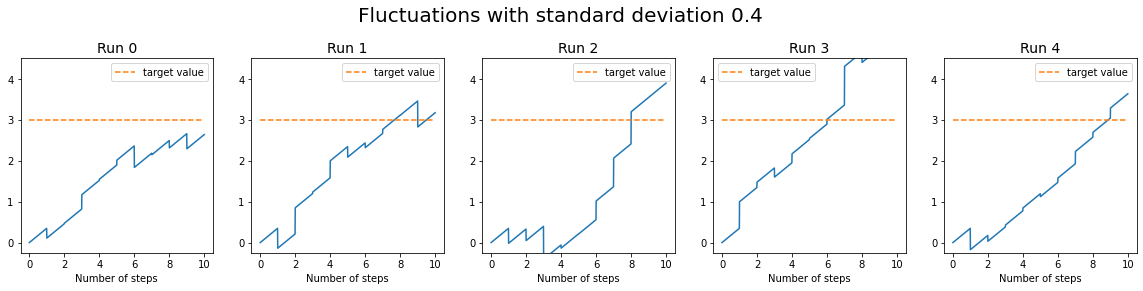

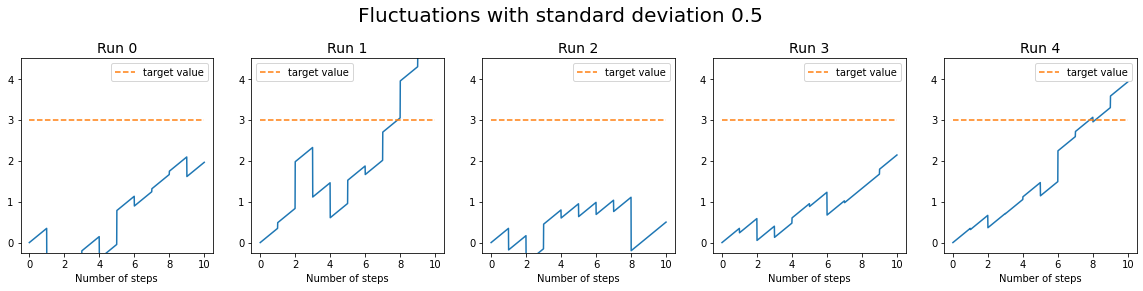

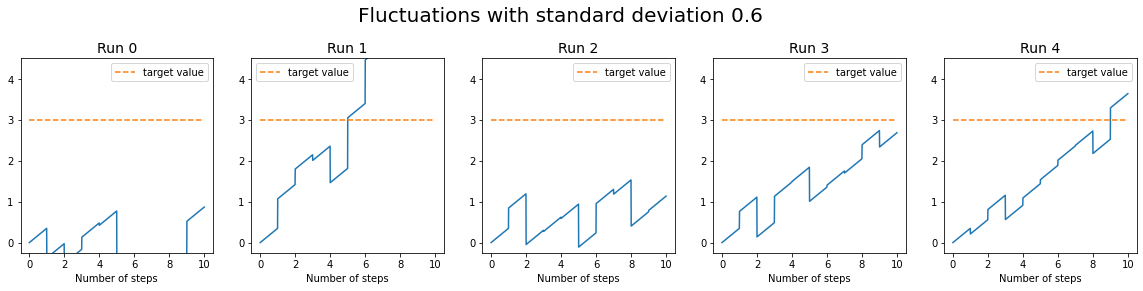

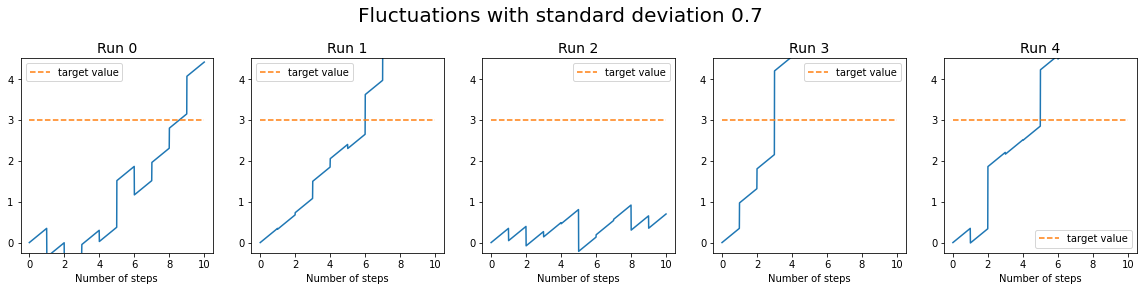

In [6]:
for sigma in sigmas:
    fig, ax = plt.subplots(1, no_of_runs_per_sigma, figsize=(20,4))
    for i in range(no_of_runs_per_sigma):#plot fluctuated y
        #create fluctuated y
        fluct_pre_steps = np.cumsum(np.random.normal(0, sigma, no_of_fluctuations-1))#fluctuation steps
        fluct_steps = np.concatenate((np.array([0]), fluct_pre_steps))
        fluct = spreaded_array(fluct_steps, no_of_x_points)#actual fluctuation vector
        y_fluctuated = y + fluct
        #plot fluctuated y
        ax[i].plot(x, y_fluctuated)
        #plot target value
        ax[i].plot(x, np.full((1,len(x)), target_value)[0], '--', label='target value')
        #label plot (and set delimiters)
        fig.suptitle('Fluctuations with standard deviation' + ' ' + str(sigma), fontsize=20)
        ax[i].set_title('Run' + ' ' + str(i), fontsize=14)
        ax[i].set_xlabel('Number of steps')
        ax[i].set_ylim(0 + (-0.25), 4.5)
        ax[i].legend()
        plt.subplots_adjust(top=0.8)

##### Conclusions

*The project is merely a visualisation and is not an actual analysis of a problem. 
Nevertheless, our experiments suggest that for standard deviations between 0.1 and 0.4 the path usually reaches the desired target value and for standard deviations larger or equal to 0.5 the result of an experiment seems to be largely random.*